# Исследовательский анализ данных

План проекта:

1. Анализ данных.
2. Выявление признаков.
3. Слияние всех признаков в один датасет.
4. Обучение различных моделей МО.
5. Финальное тестирование моделей МО.
6. Выводы.

Содержание данной работы:

<a href='#section1'>1. Анализ данных об электродах.</a>

<a href='#section2'>2. Анализ данных по результатам измерения температуры.</a>

<a href='#section3'>3. Анализ данных о подаче сыпучих материалов.</a>

<a href='#section4'>4. Анализ данных о подаче проволочных материалов.</a>

<a href='#section5'>5. Анализ данных о продувке сплава газом.</a>

<a href='#section6'>6. Вывод.</a>


<a id='section1'></a>

## 1. Анализ данных об электродах.

In [1]:
import pandas as pd

arcs_df = pd.read_csv('data_arc.csv', 
                     parse_dates=['Начало нагрева дугой', 'Конец нагрева дугой'])
print(arcs_df.info())
arcs_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB
None


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


Активная составляющая потребляемой любой нагрузкой мощности электрического тока совершает полезную работу и трансформируется в нужные нам виды энергии (тепловую, световую, звуковую и т.п.).

Реактивная составляющая электрического тока возникает только в цепях, содержащих реактивные элементы (индуктивности и ёмкости) и расходуется обычно на бесполезный нагрев проводников, из которых составлена эта цепь.

Рассчитаем Полную мощность по правилу треугольника:

In [2]:
import numpy as np

arcs_df['Полная мощность'] = np.sqrt(arcs_df['Активная мощность']**2 + arcs_df['Реактивная мощность']**2)
arcs_df.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043,0.521549
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914,1.574162
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281,0.577638
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874,0.975867
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494,1.256527


Создадим столбец с продолжительностью нагрева в секундах на каждой итерации.

In [3]:
arcs_df['Время нагрева'] = arcs_df['Конец нагрева дугой'] - arcs_df['Начало нагрева дугой']
arcs_df['Время нагрева (сек)'] = arcs_df['Время нагрева'].dt.total_seconds()
arcs_df.drop('Время нагрева', axis=1, inplace=True)
arcs_df.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева (сек)
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239,148.0
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043,0.521549,137.0
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914,1.574162,338.0
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281,0.577638,126.0
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874,0.975867,210.0
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494,1.256527,280.0


Посмотрим как Полная мощность коррелирует с временем нагрева на каждой итерации.

(-1.0, 8.0)

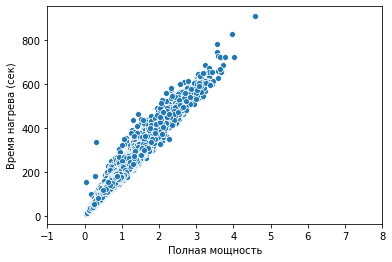

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(arcs_df['Полная мощность'], arcs_df['Время нагрева (сек)'])
plt.xlim(-1,8)

Достаточно сильная корреляция, что вполне логично: дольше греем - больше затрачивается мощности.

Посчитаем соотношение между активной и реактивной мощностями.

In [5]:
arcs_df['А/Р'] = arcs_df['Активная мощность'] / arcs_df['Реактивная мощность']
arcs_df.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева (сек),А/Р
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639,228.0,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010,185.0,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038,172.0,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470,365.0,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239,148.0,1.671717


In [6]:
arcs_df['Реактивная мощность'].sort_values()

9780    -715.504924
5596       0.020806
2419       0.021154
4914       0.022485
4633       0.022983
            ...    
13760      2.335088
12424      2.397032
9361       2.459959
9226       2.504206
7799       2.676388
Name: Реактивная мощность, Length: 14876, dtype: float64

In [7]:
arcs_df.iloc[9777:9783]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева (сек),А/Р
9777,2115,2019-07-24 00:21:20,2019-07-24 00:22:21,0.259949,0.175169,0.313461,61.0,1.483989
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141,0.530511,122.0,1.415252
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352,0.742616,135.0,1.518947
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924,715.505096,109.0,-0.000693
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796,0.359361,67.0,1.505906
9782,2117,2019-07-24 01:06:01,2019-07-24 01:07:57,0.443970,0.367739,0.576491,116.0,1.207299


Очевидный выброс значений на 3 итерации 2116-ой партии. Избавимся от него.

In [8]:
arcs_df.drop(9780, inplace=True)
arcs_df = arcs_df.reset_index()
arcs_df.iloc[9777:9783]

,index,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева (сек),А/Р
9777,9777,2115,2019-07-24 00:21:20,2019-07-24 00:22:21,0.259949,0.175169,0.313461,61.0,1.483989
9778,9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141,0.530511,122.0,1.415252
9779,9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352,0.742616,135.0,1.518947
9780,9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796,0.359361,67.0,1.505906
9781,9782,2117,2019-07-24 01:06:01,2019-07-24 01:07:57,0.443970,0.367739,0.576491,116.0,1.207299
9782,9783,2117,2019-07-24 01:11:41,2019-07-24 01:15:02,0.875074,0.754924,1.155709,201.0,1.159155


Для каждой партии вычислим следующие величины:

- Суммарное время нагрева электродами, то есть сумму значений по всем промежуткам между запусками нагрева электродов.
- Количество запусков нагрева электродами.
- Среднее соотношение потребления активной и реактивной мощности.
- Среднюю Активную, Реактивную и Полную мощность.

In [9]:
summary_time = arcs_df.pivot_table(index='key', values='Время нагрева (сек)', aggfunc='sum')
num_of_iter = arcs_df.pivot_table(index='key', values='Время нагрева (сек)', aggfunc='count')
A_P_ratio = arcs_df.pivot_table(index='key', values='А/Р', aggfunc='mean')
mean_A_power = arcs_df.pivot_table(index='key', values='Активная мощность', aggfunc='mean')
mean_P_power = arcs_df.pivot_table(index='key', values='Реактивная мощность', aggfunc='mean')
mean_S_power = arcs_df.pivot_table(index='key', values='Полная мощность', aggfunc='mean')

result_df = pd.concat([summary_time,num_of_iter,A_P_ratio, mean_A_power, mean_P_power, mean_S_power], axis=1)
result_df.columns = ['sum_heat_time_sec', 'num_of_iters', 'mean_APratio', 'mean_A_power', 'mean_P_power', 'mean_S_power']
result_df

,sum_heat_time_sec,num_of_iters,mean_APratio,mean_A_power,mean_P_power,mean_S_power
key,,,,,,
1,1098.0,5,1.538898,0.975629,0.636648,1.165279
2,811.0,4,1.551834,0.763150,0.499528,0.912304
3,655.0,5,1.583120,0.505176,0.319815,0.597907
4,741.0,4,1.563487,0.802313,0.515074,0.953741
5,869.0,4,1.480428,0.836793,0.563161,1.008939
...,...,...,...,...,...,...
3237,909.0,5,1.384203,0.786493,0.565692,0.968996
3238,546.0,3,1.257794,0.702176,0.560394,0.898847
3239,1216.0,8,1.497918,0.583344,0.388952,0.701485


Посмотрим на основные статистики найденных признаков.

In [10]:
result_df.describe()

,sum_heat_time_sec,num_of_iters,mean_APratio,mean_A_power,mean_P_power,mean_S_power
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,794.545115,4.628189,1.357567,0.671067,0.501532,0.839603
std,332.491076,1.608866,0.132769,0.207490,0.153933,0.254801
min,57.000000,1.000000,0.676106,0.186226,0.130062,0.228541
25%,571.000000,4.000000,1.292948,0.519691,0.387213,0.651715
50%,770.000000,4.000000,1.370596,0.646633,0.489478,0.816478
75%,983.000000,6.000000,1.438313,0.797201,0.599788,0.996717
max,4189.000000,16.000000,1.782164,1.819169,1.141721,2.147979


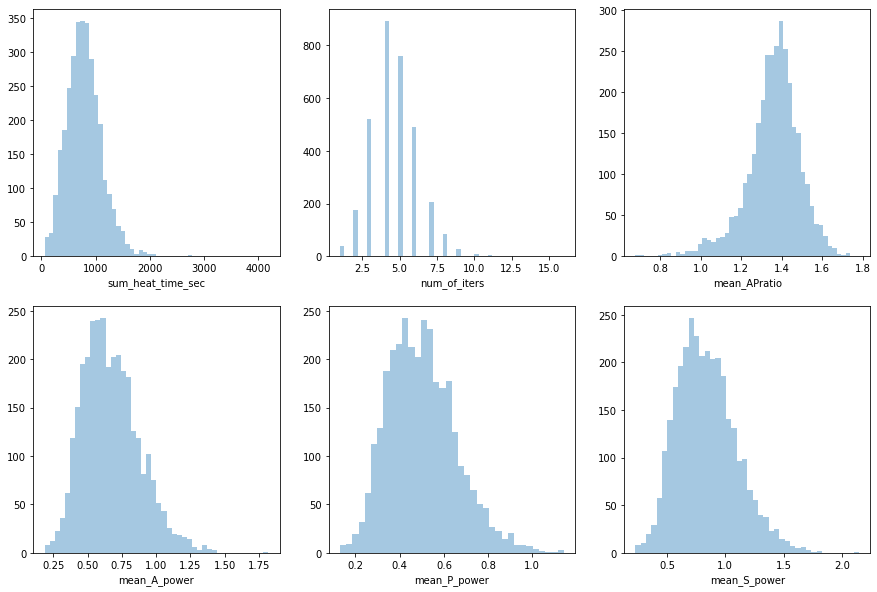

In [11]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.distplot(result_df['sum_heat_time_sec'], kde=False, ax=axes[0,0])
sns.distplot(result_df['num_of_iters'], kde=False, ax=axes[0,1])
sns.distplot(result_df['mean_APratio'], kde=False, ax=axes[0,2])
sns.distplot(result_df['mean_A_power'], kde=False, ax=axes[1,0])
sns.distplot(result_df['mean_P_power'], kde=False, ax=axes[1,1])
sns.distplot(result_df['mean_S_power'], kde=False, ax=axes[1,2])

plt.show()

Все распределения средних значений мощностей схожи. При создании модели посмотрим помогут ли все эти признаки увеличить метрику.

Теперь посчитаем длительность по времени между первым и последним замером температуры. Выделим для каждой партии первую и последнюю температуру, где первая будет признаков, а последняя - целевым признаком. Для всего этого загрузим новый дтасет.

<a id='section2'></a>

## 2. Анализ данных по результатам измерения температуры.

In [12]:
df_temp = pd.read_csv('data_temp.csv', parse_dates=['Время замера'])
print(df_temp.info())
df_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB
None


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Сразу бросается в глаза наличие пропусков в столбце с Температурой. Часть этих пропусков может принадлежать промежуточным замерам. Выясним какие патрии нужно будет отбросить, вычислив все необходимые агрегируемые признаки.

In [13]:
first_and_last = df_temp.pivot_table(index='key', values=['Время замера', 'Температура'], aggfunc=['first', 'last'])
first_and_last.columns = ['first_measure', 'first_temp', 'last_measure', 'last_temp']
first_and_last['time'] = first_and_last['last_measure'] - first_and_last['first_measure']
first_and_last['total_measure_time_sec'] = first_and_last['time'].dt.total_seconds()
first_and_last.drop(['first_measure', 'last_measure', 'time'], axis=1, inplace=True)
first_and_last

,first_temp,last_temp,total_measure_time_sec
key,,,
1,1571.0,1613.0,861.0
2,1581.0,1602.0,1305.0
3,1596.0,1599.0,1300.0
4,1601.0,1625.0,388.0
5,1576.0,1602.0,762.0
...,...,...,...
3237,1569.0,1569.0,1299.0
3238,1584.0,1584.0,749.0
3239,1598.0,1598.0,3148.0


In [14]:
print('Количество уникальных партий в датасете по электродам: {}'.format(arcs_df['key'].nunique()))
print('Количество уникальных партий в датасете по температурам: {}'.format(df_temp['key'].nunique()))

Количество уникальных партий в датасете по электродам: 3214
Количество уникальных партий в датасете по температурам: 3216


Несмотря на пропуски в датасете по температурам, мы все таки смогли выделить все необходимые признаки без потерь. Однако, в дальнейшем при слиянии данные по 2м партиям пропадут, но это не страшно.

In [15]:
final_summary = pd.concat([result_df, first_and_last], axis=1)
final_summary.dropna(inplace=True)
final_summary

,sum_heat_time_sec,num_of_iters,mean_APratio,mean_A_power,mean_P_power,mean_S_power,first_temp,last_temp,total_measure_time_sec
key,,,,,,,,,
1,1098.0,5.0,1.538898,0.975629,0.636648,1.165279,1571.0,1613.0,861.0
2,811.0,4.0,1.551834,0.763150,0.499528,0.912304,1581.0,1602.0,1305.0
3,655.0,5.0,1.583120,0.505176,0.319815,0.597907,1596.0,1599.0,1300.0
4,741.0,4.0,1.563487,0.802313,0.515074,0.953741,1601.0,1625.0,388.0
5,869.0,4.0,1.480428,0.836793,0.563161,1.008939,1576.0,1602.0,762.0
...,...,...,...,...,...,...,...,...,...
3237,909.0,5.0,1.384203,0.786493,0.565692,0.968996,1569.0,1569.0,1299.0
3238,546.0,3.0,1.257794,0.702176,0.560394,0.898847,1584.0,1584.0,749.0
3239,1216.0,8.0,1.497918,0.583344,0.388952,0.701485,1598.0,1598.0,3148.0


In [16]:
final_summary.corr()['last_temp'].sort_values()

num_of_iters             -0.009505
sum_heat_time_sec         0.035776
total_measure_time_sec    0.037680
mean_P_power              0.045081
mean_S_power              0.071557
mean_APratio              0.081019
mean_A_power              0.086703
first_temp                0.562424
last_temp                 1.000000
Name: last_temp, dtype: float64

На первый взгляд кажется, что целевой признак хорошо коррелирует лишь с одним (первой измеренной температурой).

Поглядим на распределения новых признаков.

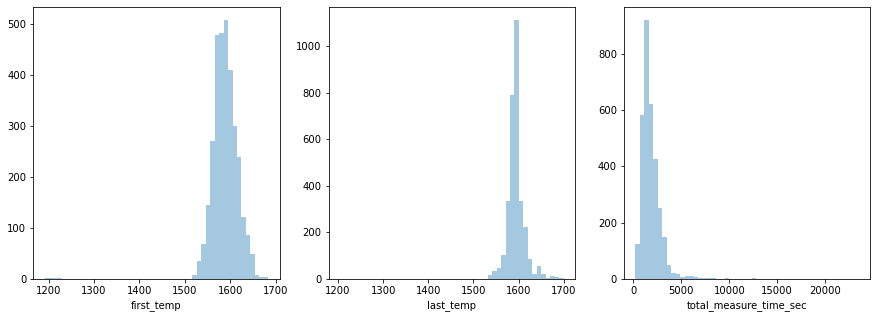

In [17]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

sns.distplot(final_summary['first_temp'], kde=False, ax=axes[0])
sns.distplot(final_summary['last_temp'], kde=False, ax=axes[1])
sns.distplot(final_summary['total_measure_time_sec'], kde=False, ax=axes[2])

plt.show()

Распределения первой и последней температур схожи, хоть у последней и меньший разброс. Распределение времени между первым и последним замерами напоминает распределение Пуассона.

<a id='section3'></a>

## 3. Анализ данных о подаче сыпучих материалов.

In [18]:
bulk_volume_df = pd.read_csv('data_bulk.csv', index_col = 0)
print(bulk_volume_df.info())
bulk_volume_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bulk 1   252 non-null    float64
 1   Bulk 2   22 non-null     float64
 2   Bulk 3   1298 non-null   float64
 3   Bulk 4   1014 non-null   float64
 4   Bulk 5   77 non-null     float64
 5   Bulk 6   576 non-null    float64
 6   Bulk 7   25 non-null     float64
 7   Bulk 8   1 non-null      float64
 8   Bulk 9   19 non-null     float64
 9   Bulk 10  176 non-null    float64
 10  Bulk 11  177 non-null    float64
 11  Bulk 12  2450 non-null   float64
 12  Bulk 13  18 non-null     float64
 13  Bulk 14  2806 non-null   float64
 14  Bulk 15  2248 non-null   float64
dtypes: float64(15)
memory usage: 391.1 KB
None


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0


Взглянем на пропуски.

In [19]:
#Count missing values ineach column
null_counts = bulk_volume_df.isnull().sum()
#Percentage of missing values in each column
null_pct = null_counts / bulk_volume_df.shape[0] * 100

#Unifying the last two steps
null_df = pd.DataFrame({'Number of missing values':null_counts,'Percents':null_pct})
null_df = null_df.sort_values(by='Number of missing values', ascending=False)
null_df = null_df.T.astype(int)
null_df

,Bulk 8,Bulk 13,Bulk 9,Bulk 2,Bulk 7,Bulk 5,Bulk 10,Bulk 11,Bulk 1,Bulk 6,Bulk 4,Bulk 3,Bulk 15,Bulk 12,Bulk 14
Number of missing values,3128,3111,3110,3107,3104,3052,2953,2952,2877,2553,2115,1831,881,679,323
Percents,99,99,99,99,99,97,94,94,91,81,67,58,28,21,10


Очень много пропусков. Взглянем на данне по времени подачи сыпучих материалов.

In [20]:
bulk_time_df = pd.read_csv('data_bulk_time.csv', parse_dates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], index_col = 0)
print(bulk_time_df.info())
bulk_time_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Bulk 1   252 non-null    datetime64[ns]
 1   Bulk 2   22 non-null     datetime64[ns]
 2   Bulk 3   1298 non-null   datetime64[ns]
 3   Bulk 4   1014 non-null   datetime64[ns]
 4   Bulk 5   77 non-null     datetime64[ns]
 5   Bulk 6   576 non-null    datetime64[ns]
 6   Bulk 7   25 non-null     datetime64[ns]
 7   Bulk 8   1 non-null      datetime64[ns]
 8   Bulk 9   19 non-null     datetime64[ns]
 9   Bulk 10  176 non-null    datetime64[ns]
 10  Bulk 11  177 non-null    datetime64[ns]
 11  Bulk 12  2450 non-null   datetime64[ns]
 12  Bulk 13  18 non-null     datetime64[ns]
 13  Bulk 14  2806 non-null   datetime64[ns]
 14  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15)
memory usage: 391.1 KB
None


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56
6,NaT,NaT,NaT,2019-05-03 13:59:24,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:53:27,NaT,2019-05-03 13:53:27,2019-05-03 13:53:27
7,NaT,NaT,NaT,2019-05-03 14:29:14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:22:19,NaT,2019-05-03 14:22:19,2019-05-03 14:22:19
8,NaT,NaT,NaT,2019-05-03 15:04:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:55:46,NaT,2019-05-03 14:55:46,2019-05-03 14:55:46
9,NaT,NaT,NaT,2019-05-03 15:47:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 15:41:00,NaT,2019-05-03 15:41:00,2019-05-03 15:41:00


In [21]:
#Count missing values ineach column
null_counts = bulk_time_df.isnull().sum()
#Percentage of missing values in each column
null_pct = null_counts / bulk_time_df.shape[0] * 100

#Unifying the last two steps
null_df = pd.DataFrame({'Number of missing values':null_counts,'Percents':null_pct})
null_df = null_df.sort_values(by='Number of missing values', ascending=False)
null_df = null_df.T.astype(int)
null_df

,Bulk 8,Bulk 13,Bulk 9,Bulk 2,Bulk 7,Bulk 5,Bulk 10,Bulk 11,Bulk 1,Bulk 6,Bulk 4,Bulk 3,Bulk 15,Bulk 12,Bulk 14
Number of missing values,3128,3111,3110,3107,3104,3052,2953,2952,2877,2553,2115,1831,881,679,323
Percents,99,99,99,99,99,97,94,94,91,81,67,58,28,21,10


Сразу видно, что пропуски в датасетах по объему и времени подачи сыпучих материалов полностью идентичны. В данном случае с пропусками ничего делать не нужно, так как каждый признак отвечает за определенный материал, который как может добавляться в партии, так и не добавляться. Здесь логичнее всего заполнить пропуски нулями, что будет характеризовать отсутствие добавления материала. 

In [22]:
(bulk_time_df['Bulk 12'] - bulk_time_df['Bulk 14']).value_counts().head()

00:00:00             2307
-1 days +23:59:59      39
00:02:46                2
00:06:50                2
00:03:21                2
dtype: int64

In [23]:
(bulk_time_df['Bulk 12'] - bulk_time_df['Bulk 15']).value_counts().head()

00:00:00             2153
00:00:01               25
-1 days +23:57:09       1
-1 days +23:56:42       1
00:10:17                1
dtype: int64

In [24]:
(bulk_time_df['Bulk 15'] - bulk_time_df['Bulk 14']).value_counts().head()

00:00:00             2118
-1 days +23:59:59      61
00:03:21                2
00:03:19                1
00:28:42                1
dtype: int64

Чаще всего в партиях добавляют материалы 12, 14 и 15, к тому же еще и одновременно (но в разном объеме).

In [25]:
(bulk_time_df['Bulk 4'] - bulk_time_df['Bulk 3']).value_counts().head()

00:00:00             116
00:11:42               3
00:00:01               3
00:10:30               2
-1 days +23:48:52      2
dtype: int64

Материалы 3 и 4 тоже добавляют нередко, но совпадения особо тут нету как в предыдыдущем случае.

Датасет с временем добавления сыпучего материала не пригодится для нашей будущей модели, а с объемом, думаю, пригодится.

In [26]:
bulk_volume_df.fillna(0, inplace=True)
bulk_volume_df.head()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [27]:
final_summary = pd.concat([final_summary, bulk_volume_df], axis=1)
final_summary.dropna(inplace=True)
final_summary

,sum_heat_time_sec,num_of_iters,mean_APratio,mean_A_power,mean_P_power,mean_S_power,first_temp,last_temp,total_measure_time_sec,Bulk 1,...,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,,,,,,,
1,1098.0,5.0,1.538898,0.975629,0.636648,1.165279,1571.0,1613.0,861.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
2,811.0,4.0,1.551834,0.763150,0.499528,0.912304,1581.0,1602.0,1305.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
3,655.0,5.0,1.583120,0.505176,0.319815,0.597907,1596.0,1599.0,1300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
4,741.0,4.0,1.563487,0.802313,0.515074,0.953741,1601.0,1625.0,388.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
5,869.0,4.0,1.480428,0.836793,0.563161,1.008939,1576.0,1602.0,762.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,909.0,5.0,1.384203,0.786493,0.565692,0.968996,1569.0,1569.0,1299.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0
3238,546.0,3.0,1.257794,0.702176,0.560394,0.898847,1584.0,1584.0,749.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0
3239,1216.0,8.0,1.497918,0.583344,0.388952,0.701485,1598.0,1598.0,3148.0,0.0,...,114.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0


In [28]:
final_summary.isnull().sum()

sum_heat_time_sec         0
num_of_iters              0
mean_APratio              0
mean_A_power              0
mean_P_power              0
mean_S_power              0
first_temp                0
last_temp                 0
total_measure_time_sec    0
Bulk 1                    0
Bulk 2                    0
Bulk 3                    0
Bulk 4                    0
Bulk 5                    0
Bulk 6                    0
Bulk 7                    0
Bulk 8                    0
Bulk 9                    0
Bulk 10                   0
Bulk 11                   0
Bulk 12                   0
Bulk 13                   0
Bulk 14                   0
Bulk 15                   0
dtype: int64

<a id='section4'></a>

## 4. Анализ данных о проволочных материалах.


In [29]:
wire_volume_df = pd.read_csv('data_wire.csv', index_col=0)
print(wire_volume_df.info())
wire_volume_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wire 1  3055 non-null   float64
 1   Wire 2  1079 non-null   float64
 2   Wire 3  63 non-null     float64
 3   Wire 4  14 non-null     float64
 4   Wire 5  1 non-null      float64
 5   Wire 6  73 non-null     float64
 6   Wire 7  11 non-null     float64
 7   Wire 8  19 non-null     float64
 8   Wire 9  29 non-null     float64
dtypes: float64(9)
memory usage: 240.7 KB
None


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Count missing values ineach column
null_counts = wire_volume_df.isnull().sum()
#Percentage of missing values in each column
null_pct = null_counts / wire_volume_df.shape[0] * 100

#Unifying the last two steps
null_df = pd.DataFrame({'Number of missing values':null_counts,'Percents':null_pct})
null_df = null_df.sort_values(by='Number of missing values', ascending=False)
null_df = null_df.T.astype(int)
null_df

,Wire 5,Wire 7,Wire 4,Wire 8,Wire 9,Wire 3,Wire 6,Wire 2,Wire 1
Number of missing values,3080,3070,3067,3062,3052,3018,3008,2002,26
Percents,99,99,99,99,99,97,97,64,0


Практически всегда добавляется проволочный материал 1, значительно реже 2 и почти никогда все остальные.

In [31]:
wire_time_df = pd.read_csv('data_wire_time.csv', parse_dates = [1,2,3,4,5,6,7,8,9], index_col = 0)
print(wire_time_df.info())
wire_time_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Wire 1  3055 non-null   datetime64[ns]
 1   Wire 2  1079 non-null   datetime64[ns]
 2   Wire 3  63 non-null     datetime64[ns]
 3   Wire 4  14 non-null     datetime64[ns]
 4   Wire 5  1 non-null      datetime64[ns]
 5   Wire 6  73 non-null     datetime64[ns]
 6   Wire 7  11 non-null     datetime64[ns]
 7   Wire 8  19 non-null     datetime64[ns]
 8   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 240.7 KB
None


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,2019-05-03 14:28:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,2019-05-03 15:03:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [32]:
#Count missing values ineach column
null_counts = wire_time_df.isnull().sum()
#Percentage of missing values in each column
null_pct = null_counts / wire_time_df.shape[0] * 100

#Unifying the last two steps
null_df = pd.DataFrame({'Number of missing values':null_counts,'Percents':null_pct})
null_df = null_df.sort_values(by='Number of missing values', ascending=False)
null_df = null_df.T.astype(int)
null_df

,Wire 5,Wire 7,Wire 4,Wire 8,Wire 9,Wire 3,Wire 6,Wire 2,Wire 1
Number of missing values,3080,3070,3067,3062,3052,3018,3008,2002,26
Percents,99,99,99,99,99,97,97,64,0


Пропуски времени и объема подачи проволочных материалов идентичны, что не удивительно. Отбросим датасет с временем и добавим значения по объему в наш финальный.

In [33]:
wire_volume_df.fillna(0, inplace=True)
final_summary = pd.concat([final_summary, wire_volume_df], axis=1)
final_summary.dropna(inplace=True)
final_summary

,sum_heat_time_sec,num_of_iters,mean_APratio,mean_A_power,mean_P_power,mean_S_power,first_temp,last_temp,total_measure_time_sec,Bulk 1,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,
1,1098.0,5.0,1.538898,0.975629,0.636648,1.165279,1571.0,1613.0,861.0,0.0,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,811.0,4.0,1.551834,0.763150,0.499528,0.912304,1581.0,1602.0,1305.0,0.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,655.0,5.0,1.583120,0.505176,0.319815,0.597907,1596.0,1599.0,1300.0,0.0,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,741.0,4.0,1.563487,0.802313,0.515074,0.953741,1601.0,1625.0,388.0,0.0,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,869.0,4.0,1.480428,0.836793,0.563161,1.008939,1576.0,1602.0,762.0,0.0,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,909.0,5.0,1.384203,0.786493,0.565692,0.968996,1569.0,1569.0,1299.0,0.0,...,206.0,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3238,546.0,3.0,1.257794,0.702176,0.560394,0.898847,1584.0,1584.0,749.0,0.0,...,106.0,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3239,1216.0,8.0,1.497918,0.583344,0.388952,0.701485,1598.0,1598.0,3148.0,0.0,...,88.0,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
final_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 1 to 3241
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sum_heat_time_sec       3024 non-null   float64
 1   num_of_iters            3024 non-null   float64
 2   mean_APratio            3024 non-null   float64
 3   mean_A_power            3024 non-null   float64
 4   mean_P_power            3024 non-null   float64
 5   mean_S_power            3024 non-null   float64
 6   first_temp              3024 non-null   float64
 7   last_temp               3024 non-null   float64
 8   total_measure_time_sec  3024 non-null   float64
 9   Bulk 1                  3024 non-null   float64
 10  Bulk 2                  3024 non-null   float64
 11  Bulk 3                  3024 non-null   float64
 12  Bulk 4                  3024 non-null   float64
 13  Bulk 5                  3024 non-null   float64
 14  Bulk 6                  3024 non-null   

<a id='section5'></a>

## 5. Анализ данных о продувке сплава газом.


In [35]:
gas_df = pd.read_csv('data_gas.csv', index_col=0)
print(gas_df.info())
gas_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Газ 1   3239 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB
None


,Газ 1
key,
1,29.749986
2,12.555561
3,28.554793
4,18.841219
5,5.413692


Добавим этот признак.

In [36]:
final_summary = pd.concat([final_summary, gas_df], axis=1)
final_summary.dropna(inplace=True)
final_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 1 to 3241
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sum_heat_time_sec       3022 non-null   float64
 1   num_of_iters            3022 non-null   float64
 2   mean_APratio            3022 non-null   float64
 3   mean_A_power            3022 non-null   float64
 4   mean_P_power            3022 non-null   float64
 5   mean_S_power            3022 non-null   float64
 6   first_temp              3022 non-null   float64
 7   last_temp               3022 non-null   float64
 8   total_measure_time_sec  3022 non-null   float64
 9   Bulk 1                  3022 non-null   float64
 10  Bulk 2                  3022 non-null   float64
 11  Bulk 3                  3022 non-null   float64
 12  Bulk 4                  3022 non-null   float64
 13  Bulk 5                  3022 non-null   float64
 14  Bulk 6                  3022 non-null   

In [41]:
final_summary.corr()['last_temp'].sort_values()

Wire 2                   -0.146710
Bulk 6                   -0.143440
Bulk 11                  -0.102287
mean_P_power             -0.098956
mean_S_power             -0.085307
mean_A_power             -0.073852
Wire 4                   -0.073787
Bulk 3                   -0.041298
Wire 6                   -0.028907
Bulk 9                   -0.025915
Wire 8                   -0.023507
Bulk 5                   -0.016901
Bulk 1                   -0.016357
Bulk 8                   -0.014097
Wire 3                   -0.011732
Wire 9                   -0.010109
Bulk 7                   -0.007441
Bulk 13                   0.006843
sum_heat_time_sec         0.023584
Bulk 2                    0.023716
Bulk 14                   0.024962
Wire 5                    0.034006
Wire 7                    0.042137
Газ 1                     0.043871
Bulk 10                   0.058145
mean_APratio              0.061291
num_of_iters              0.062532
Bulk 12                   0.113009
total_measure_time_s

<a id='section6'></a>

## 6. Вывод.

В результате проделанной работы, мы извлекли суммарное время нагрева электродами для каждой партии, вычислили средние значения мощностей и количество итераций на каждой партии. Извлекли время между первым и последним замером температуры, а также достали сами значения температур, где последняя и является нашим целевым признаком, а первая - обчным признаком. К вышеупомянутым признакам доабвили значения объемов сыпучих и проволочных материалов и информацию о продувке инертным газом. Финальный датасет содержит 33 признака.

Вопросов по проекту не имею, так как тимлид на все ответил на встрече.

In [38]:
# final_summary.drop([], inplace=True)


In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


features = final_summary.drop('first_temp',axis=1)
target   = final_summary['first_temp']
features = scaler.fit_transform(features)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'alpha': np.arange(0.01,1,0.01)
}
model      = Lasso(random_state=42)
gs = GridSearchCV(
            estimator=model,
            param_grid=param_grid, 
            cv=5, 
            n_jobs=-1, 
            scoring='neg_mean_absolute_error',
            verbose=2
        )

gs.fit(features_train, target_train)
print(gs.best_estimator_)
print(gs.best_score_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s


Lasso(alpha=0.09999999999999999, random_state=42)
-10.984670039968524


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    4.1s finished


In [40]:
# from sklearn.svm import SVR

# param_grid = {
#     'kernel': ['rbf'],
#     'C': np.arange(100,1000,50)
# }

# model      = SVR()
# rnd_search = RandomizedSearchCV(model, param_distributions=param_grid,
#                                 n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
# rnd_search.fit(features_train, target_train)
# print((-1)*rnd_search.best_score_)
# rnd_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
# import lightgbm as lgb

# model = lgb.LGBMRegressor()
# param_grid = {
#     'n_estimators': np.arange(25,250,25),
#     'max_depth': np.arange(2,18,4)
# }

# gs = GridSearchCV(
#             estimator=model,
#             param_grid=param_grid, 
#             cv=5, 
#             n_jobs=-1, 
#             scoring='neg_mean_absolute_error',
#             verbose=2
#         )
# gs.fit(features_train, target_train)
# print(gs.best_score_)
# gs.best_estimator_

In [ ]:
# import lightgbm as lgb

# model = lgb.LGBMRegressor()
# param_grid = {
# #     'n_estimators': np.arange(45,55,1),
#     'max_depth': np.arange(4,8,1),
# }

# gs = GridSearchCV(
#             estimator=model,
#             param_grid=param_grid, 
#             cv=5, 
#             n_jobs=-1, 
#             scoring='neg_mean_absolute_error',
#             verbose=2
#         )
# gs.fit(features_train, target_train)
# print(gs.best_score_)
# gs.best_estimator_

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# param_grid = {
#     'n_estimators': np.arange(25,250,25),
#     'max_depth': np.arange(4,18,4),
#     'min_samples_split': np.arange(2,40,8)
# }

# model      = RandomForestRegressor(random_state=42)
# gs = GridSearchCV(
#             estimator=model,
#             param_grid=param_grid, 
#             cv=5, 
#             n_jobs=-1, 
#             scoring='neg_mean_absolute_error',
#             verbose=2
#         )

# gs.fit(features_train, target_train)
# print(gs.best_score_)
# gs.best_estimator_

In [ ]:
# from sklearn.svm import SVR

# param_grid = {
#     'kernel': ['rbf'],
#     'C': np.arange(100,1000,50)
# }

# model      = SVR()
# rnd_search = RandomizedSearchCV(model, param_distributions=param_grid,
#                                 n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
# rnd_search.fit(features_train, target_train)
# print((-1)*rnd_search.best_score_)
# rnd_search.best_estimator_

In [ ]:
# from catboost import CatBoostRegressor

# model = CatBoostRegressor()
# param_grid = {
#     'depth': np.arange(2,16,4),
#     'learning_rate': np.arange(0.01, 1, 0.03),
#     'iterations': np.arange(10,100,20)
# }
# gs = GridSearchCV(
#             estimator=model,
#             param_grid=param_grid, 
#             cv=5, 
#             n_jobs=-1, 
#             scoring='neg_mean_absolute_error',
#             verbose=2
#         )

# gs.fit(features_train, target_train)
# print(gs.best_params_)
# gs.best_score_

In [ ]:
# model = CatBoostRegressor()
# param_grid = {
#     'depth': np.arange(),
#     'learning_rate': np.arange(),
#     'iterations': np.arange()
# }
# gs = GridSearchCV(
#             estimator=model,
#             param_grid=param_grid, 
#             cv=5, 
#             n_jobs=-1, 
#             scoring='neg_mean_absolute_error',
#             verbose=2
#         )

# gs.fit(features_train, target_train)
# print(gs.best_params_)
# gs.best_score_